In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

# Reading and Data Preparation

In [2]:
data = pd.read_csv(r"C:\Users\anant\Downloads\DS3_C2_S5_Classification_Practice_Glass_Data.csv")
print(data.shape)
print(data.dtypes)

(214, 11)
id_number      int64
RI           float64
Na           float64
Mg           float64
Al           float64
Si           float64
K            float64
Ca           float64
Ba           float64
Fe           float64
Type           int64
dtype: object


In [3]:
data.isnull().sum()

id_number    0
RI           0
Na           0
Mg           0
Al           0
Si           0
K            0
Ca           0
Ba           0
Fe           0
Type         0
dtype: int64

In [4]:
data.head()

,id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
data.drop(columns='id_number',inplace=True)
print(data.columns)

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


In [6]:
data.Ba.value_counts() / len(data)

0.00    0.822430
0.64    0.009346
1.57    0.009346
0.09    0.009346
1.59    0.009346
0.11    0.009346
3.15    0.004673
0.81    0.004673
1.64    0.004673
1.06    0.004673
0.54    0.004673
2.88    0.004673
1.38    0.004673
1.55    0.004673
0.67    0.004673
1.71    0.004673
0.56    0.004673
0.63    0.004673
0.53    0.004673
0.66    0.004673
0.61    0.004673
0.27    0.004673
0.69    0.004673
0.40    0.004673
0.14    0.004673
0.76    0.004673
1.68    0.004673
1.63    0.004673
1.19    0.004673
0.24    0.004673
2.20    0.004673
0.15    0.004673
0.06    0.004673
1.67    0.004673
Name: Ba, dtype: float64

In [7]:
data.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [8]:
le = LabelEncoder()
data['type'] = le.fit_transform(data.Type)

In [9]:
y_encoded=pd.DataFrame(data[['Type','type']].value_counts()).reset_index().sort_values('type')
y_encoded

,Type,type,0
1,1,0,70
0,2,1,76
3,3,2,17
4,5,3,13
5,6,4,9
2,7,5,29


In [10]:
data.drop(columns='Type', inplace=True)
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'type'], dtype='object')

In [11]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


In [12]:
#shuffle the data at random,since the dataset is grouped by type of glass
data = data.sample(frac=1)

In [13]:
data.head(20)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
25,1.51764,12.98,3.54,1.21,73.00,0.65,8.53,0.00,0.00,0
201,1.51653,11.95,0.00,1.19,75.18,2.70,8.93,0.00,0.00,5
144,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,1
42,1.51779,13.21,3.39,1.33,72.76,0.59,8.59,0.00,0.00,0
11,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0.00,0.00,0
193,1.51719,14.75,0.00,2.00,73.02,0.00,8.53,1.59,0.08,5
52,1.51808,13.43,2.87,1.19,72.84,0.55,9.03,0.00,0.00,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,0
170,1.52369,13.44,0.00,1.58,72.22,0.32,12.24,0.00,0.00,3
88,1.51618,13.01,3.50,1.48,72.89,0.60,8.12,0.00,0.00,1


# Data Normalisation

In [14]:
mm = MinMaxScaler()

In [15]:
data_tr = data.copy()
data_tr.iloc[:,:]=mm.fit_transform(data.iloc[:,:])
data_tr.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
25,0.284899,0.338346,0.788419,0.286604,0.569643,0.104670,0.288104,0.0,0.000000,0.0
201,0.236172,0.183459,0.000000,0.280374,0.958929,0.434783,0.325279,0.0,0.000000,1.0
144,0.239245,0.339850,0.708241,0.292835,0.564286,0.093398,0.314126,0.0,0.470588,0.2


In [16]:
data_tr.type = data.type
data_tr.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
25,0.284899,0.338346,0.788419,0.286604,0.569643,0.104670,0.288104,0.0,0.000000,0
201,0.236172,0.183459,0.000000,0.280374,0.958929,0.434783,0.325279,0.0,0.000000,5
144,0.239245,0.339850,0.708241,0.292835,0.564286,0.093398,0.314126,0.0,0.470588,1


# Plotting the Data

In [17]:
def plotdata(data,nc,ctype):
    if ctype not in ['h','b','m']:
        ret = 'Invalid chart type'.format(ctype)
        return(ret)
    
    if (ctype=='m'):
        cor = data.corr()
        cor = np.tril(cor)
        plt.figure(figsize=(12,8))
        plt.title('Correlation matrix')
        sns.heatmap(cor,xticklabels=nc,yticklabels=nc,vmin=-1,vmax=1,annot=True)
    
    else:
        COLS = 2
        ROWS = int(np.ceil(len(nc)/2))
        POS = 1
        fig,ax=plt.subplots(ROWS,COLS,figsize=(15,10))
        
        for c in nc:
            fig.add_subplot(ROWS,COLS,POS)
            if(ctype=='h'):
                sns.histplot(data[c],bins=20,color='green')
            else:
                sns.boxplot(data[c],color='yellow')
                
            POS+=1

In [18]:
nc=list(data.columns)
nc.remove('type')
print(nc)

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']


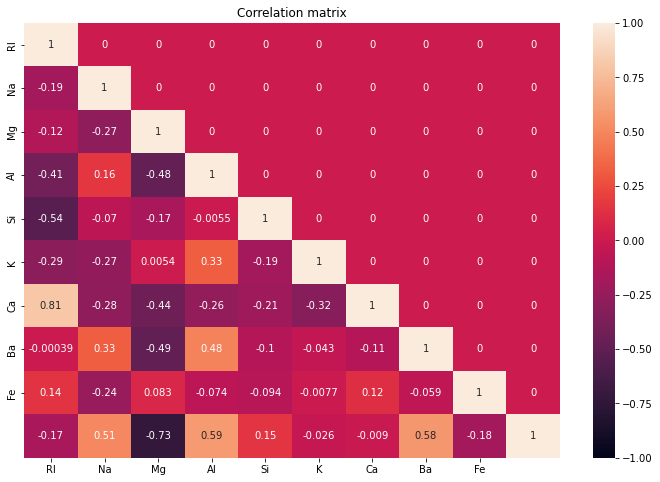

In [19]:
plotdata(data,nc,'m')

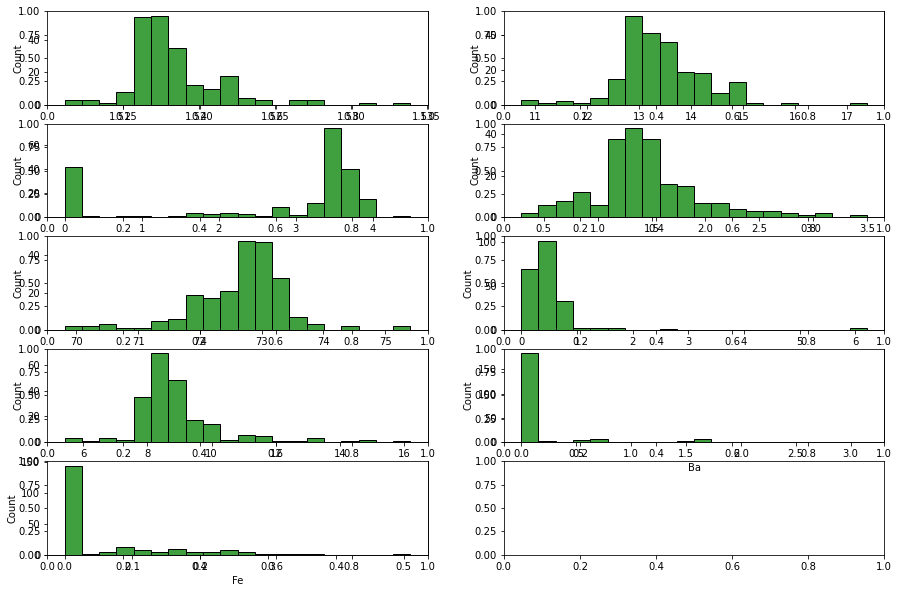

In [20]:
plotdata(data,nc,'h')

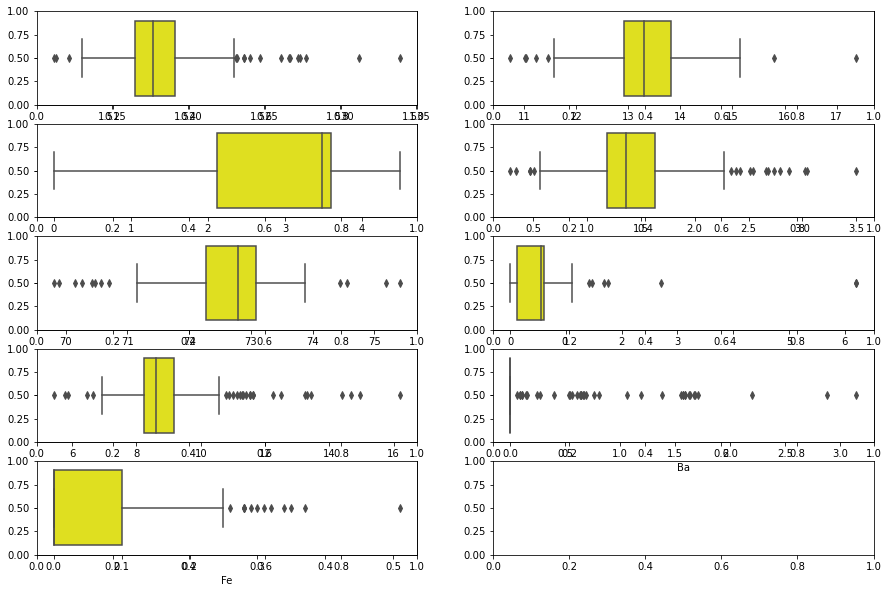

In [21]:
plotdata(data,nc,'b')

# Splitting the data

In [22]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
25,1.51764,12.98,3.54,1.21,73.00,0.65,8.53,0.00,0.00,0
201,1.51653,11.95,0.00,1.19,75.18,2.70,8.93,0.00,0.00,5
144,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,1
42,1.51779,13.21,3.39,1.33,72.76,0.59,8.59,0.00,0.00,0
11,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
99,1.51811,12.96,2.96,1.43,72.92,0.60,8.79,0.14,0.00,1
157,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.00,0.00,2
82,1.51646,13.41,3.55,1.25,72.81,0.68,8.10,0.00,0.00,1
91,1.51605,12.90,3.44,1.45,73.06,0.44,8.27,0.00,0.00,1


In [23]:
y='type'

In [24]:
def splitdata(data,y,ratio=0.25):
    trainx,testx,trainy,testy = train_test_split(data.drop(y,1),data[y],test_size=ratio)
    
    return(trainx,trainy,testx,testy)

In [25]:
trainx1,trainy1,testx1,testy1 = splitdata(data,y)

In [26]:
print('trainx={},trainy={},testx={},testy={}'.format(trainx1.shape, trainy1.shape, testx1.shape, testy1.shape))

trainx=(160, 9),trainy=(160,),testx=(54, 9),testy=(54,)


In [27]:
trainx1.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
24,1.51720,13.38,3.50,1.15,72.85,0.50,8.43,0.0,0.00
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11
119,1.51652,13.56,3.57,1.47,72.45,0.64,7.96,0.0,0.00


In [28]:
trainy1.head(3)

24     0
9      0
119    1
Name: type, dtype: int64

In [29]:
#check if the classes are present in both the train and test datasets
#train count should be greater than or equal to test count

diff_classes=set(testy1)-set(trainy1)
if len(diff_classes)>0:
    print('error:classes in test data is more than train data.Resample the dataset')
else:
    print('class distribution is ok')

class distribution is ok


In [30]:
#transform the y(train and test) variable into dummy variables

import tensorflow.keras.utils as utils 
classes = len(data_tr[y].unique())
trainy1 = utils.to_categorical(trainy1,classes)
testy1 = utils.to_categorical(testy1,classes)

In [31]:
trainy1[:5]

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [32]:
testy1[:5]

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

#one hot coding  
onht_data = pd.get_dummies(data, columns = ['Type'])  

# Model Building

In [33]:
def compilemodel(units,shape,outnode):
    model = tf.keras.Sequential([
        Dense(units,activation='tanh',input_shape=[shape]), #HL1
        Dense(units,activation='relu'), #HL2
        Dense(units,activation='relu'), #HL3
        Dense(outnode,activation='softmax') #output layer
    ]) 
    
    #compiling the model
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 
    
    return(model)

In [34]:
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,lags):
        if epoch%25 == 0:
            print('.',end=' ')


def fitmodel(model,trainx,trainy,epoch,valsplit=0.2): 
    errors=model.fit(trainx,trainy,epochs=epoch,validation_split=valsplit,verbose=0,callbacks=[PrintDot()])
    errhistory = pd.DataFrame(errors.history)
    errhistory['epoch'] = errors.epoch
    return(errhistory)

## Run the model with some initial values

In [35]:
units = 10
shape=len(trainx1.columns)              #outnode=classes directly it can be given
print(units,shape,classes)

10 9 6


In [36]:
m1=compilemodel(units,shape,classes)

In [37]:
EPOCHS = 500
e1 = fitmodel(m1,trainx1,trainy1,EPOCHS)

. . . . . . . . . . . . . . . . . . . . 

In [38]:
print(e1)

         loss  accuracy  val_loss  val_accuracy  epoch
0    2.036644  0.140625  2.004939       0.09375      0
1    1.961206  0.140625  1.934780       0.09375      1
2    1.901951  0.140625  1.879619       0.09375      2
3    1.852446  0.140625  1.833598       0.09375      3
4    1.811530  0.140625  1.795597       0.09375      4
..        ...       ...       ...           ...    ...
495  0.781222  0.656250  0.886674       0.62500    495
496  0.778818  0.656250  0.888748       0.59375    496
497  0.779126  0.679688  0.902736       0.56250    497
498  0.780879  0.664062  0.898501       0.56250    498
499  0.778738  0.664062  0.879126       0.59375    499

[500 rows x 5 columns]


In [39]:
p1 = m1.predict(testx1)

In [40]:
print(p1[0])

[5.3750223e-01 3.4542069e-01 1.1128389e-01 1.1699231e-03 4.1107489e-03
 5.1247771e-04]


In [41]:
pd.DataFrame(p1).head()

,0,1,2,3,4,5
0,0.537502,0.345421,0.111284,0.001170,0.004111,0.000512
1,0.676925,0.209208,0.111155,0.000846,0.001701,0.000165
2,0.000017,0.003814,0.000017,0.001562,0.051471,0.943120
3,0.000014,0.004922,0.000013,0.002481,0.063377,0.929194
4,0.000021,0.004029,0.000021,0.001359,0.050004,0.944565


In [42]:
# for each predicted record, find the max probability
# for max probability find the corresponding class

pd.DataFrame(p1).head().idxmax(1)

0    0
1    0
2    5
3    5
4    5
dtype: int64

In [43]:
pd.DataFrame(testy1).head().idxmax(1)

0    0
1    0
2    5
3    5
4    5
dtype: int64

In [44]:
# store the actual and predicted data in df
predy=pd.DataFrame({'actual':pd.DataFrame(testy1).idxmax(1),'predicted':pd.DataFrame(p1).idxmax(1)})
predy

,actual,predicted
0,0,0
1,0,0
2,5,5
3,5,5
4,5,5
5,0,0
6,2,0
7,1,1
8,1,1
9,2,0


In [45]:
y_encoded

,Type,type,0
1,1,0,70
0,2,1,76
3,3,2,17
4,5,3,13
5,6,4,9
2,7,5,29


In [46]:
#conversion to actual class is tobe done
predy.actual=le.inverse_transform(predy.actual)
predy.predicted=le.inverse_transform(predy.predicted)

In [47]:
predy.head()

,actual,predicted
0,1,1
1,1,1
2,7,7
3,7,7
4,7,7


In [48]:
#fun to build the confusion matrix, and print the classification scores
def cm(df):
    
    print('model accuracy={}\n'.format(accuracy_score(df.actual,df.predicted)))
    
    #confusion matrix
    print(pd.crosstab(df.actual,df.predicted,margins=True))
    print('\n')
    
    #classification report
    print(classification_report(df.actual,df.predicted))
    

In [49]:
cm(predy)

model accuracy=0.6111111111111112

predicted   1   2  5  6   7  All
actual                          
1          12   3  0  0   0   15
2           4  11  3  0   1   19
3           4   1  0  0   0    5
5           0   0  3  1   0    4
6           0   0  1  0   2    3
7           0   1  0  0   7    8
All        20  16  7  1  10   54


              precision    recall  f1-score   support

           1       0.60      0.80      0.69        15
           2       0.69      0.58      0.63        19
           3       0.00      0.00      0.00         5
           5       0.43      0.75      0.55         4
           6       0.00      0.00      0.00         3
           7       0.70      0.88      0.78         8

    accuracy                           0.61        54
   macro avg       0.40      0.50      0.44        54
weighted avg       0.54      0.61      0.57        54



# Data transformation

In [50]:
data1 = data.copy()

In [51]:
data1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
25,1.51764,12.98,3.54,1.21,73.00,0.65,8.53,0.0,0.00,0
201,1.51653,11.95,0.00,1.19,75.18,2.70,8.93,0.0,0.00,5
144,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,1
42,1.51779,13.21,3.39,1.33,72.76,0.59,8.59,0.0,0.00,0
11,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0.0,0.00,0


In [52]:
data1['bafe'] = data1['Ba']+data1['Fe']

In [53]:
data1.drop(columns=['Ba','Fe'],inplace=True)

In [54]:
data1

,RI,Na,Mg,Al,Si,K,Ca,type,bafe
25,1.51764,12.98,3.54,1.21,73.00,0.65,8.53,0,0.00
201,1.51653,11.95,0.00,1.19,75.18,2.70,8.93,5,0.00
144,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,1,0.24
42,1.51779,13.21,3.39,1.33,72.76,0.59,8.59,0,0.00
11,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0,0.00
...,...,...,...,...,...,...,...,...,...
99,1.51811,12.96,2.96,1.43,72.92,0.60,8.79,1,0.14
157,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,2,0.00
82,1.51646,13.41,3.55,1.25,72.81,0.68,8.10,1,0.00
91,1.51605,12.90,3.44,1.45,73.06,0.44,8.27,1,0.00


In [55]:
data1['log_Mg'] = np.log(data1.Mg+1)

In [56]:
data1

,RI,Na,Mg,Al,Si,K,Ca,type,bafe,log_Mg
25,1.51764,12.98,3.54,1.21,73.00,0.65,8.53,0,0.00,1.512927
201,1.51653,11.95,0.00,1.19,75.18,2.70,8.93,5,0.00,0.000000
144,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,1,0.24,1.430311
42,1.51779,13.21,3.39,1.33,72.76,0.59,8.59,0,0.00,1.479329
11,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0,0.00,1.539015
...,...,...,...,...,...,...,...,...,...,...
99,1.51811,12.96,2.96,1.43,72.92,0.60,8.79,1,0.14,1.376244
157,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,2,0.00,1.560248
82,1.51646,13.41,3.55,1.25,72.81,0.68,8.10,1,0.00,1.515127
91,1.51605,12.90,3.44,1.45,73.06,0.44,8.27,1,0.00,1.490654
